In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow


C:\Users\vikas\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikas\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikas\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikas\Anaconda3\envs\deeplearning\lib\site-

In [20]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [4]:
X=pd.concat([X,geography,gender],axis=1)

In [5]:
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


Using TensorFlow backend.


In [9]:
classifier = Sequential()

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [11]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\vikas\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 420us/step - loss: 0.6044 - accuracy: 0.7218 - val_loss: 0.5244 - val_accuracy: 0.7883
Epoch 2/100
5359/5359 [==============================] - 1s 262us/step - loss: 0.4989 - accuracy: 0.7972 - val_loss: 0.4819 - val_accuracy: 0.7967
Epoch 3/100
5359/5359 [==============================] - 1s 254us/step - loss: 0.4672 - accuracy: 0.8020 - val_loss: 0.4587 - val_accuracy: 0.8001
Epoch 4/100
5359/5359 [==============================] - 1s 191us/step - loss: 0.4475 - accuracy: 0.8041 - val_loss: 0.4442 - val_accuracy: 0.8012
Epoch 5/100
5359/5359 [==============================] - 1s 185us/step - loss: 0.4339 - accuracy: 0.8056 - val_loss: 0.4335 - val_accuracy: 0.8039
Epoch 6/100
5359/5359 [==============================] - 1s 215us/step - loss: 0.4226 - accuracy: 0.8080 - val_loss: 0.4239 - val_accuracy: 0.8039
Epoch 7/100
5359/5359 [==============================] - 1s 186us/ste

5359/5359 [==============================] - 1s 183us/step - loss: 0.3403 - accuracy: 0.8584 - val_loss: 0.3661 - val_accuracy: 0.8489
Epoch 55/100
5359/5359 [==============================] - 1s 186us/step - loss: 0.3399 - accuracy: 0.8586 - val_loss: 0.3657 - val_accuracy: 0.8489
Epoch 56/100
5359/5359 [==============================] - 1s 183us/step - loss: 0.3395 - accuracy: 0.8569 - val_loss: 0.3655 - val_accuracy: 0.8485
Epoch 57/100
5359/5359 [==============================] - 1s 180us/step - loss: 0.3389 - accuracy: 0.8567 - val_loss: 0.3656 - val_accuracy: 0.8474
Epoch 58/100
5359/5359 [==============================] - 1s 179us/step - loss: 0.3387 - accuracy: 0.8586 - val_loss: 0.3657 - val_accuracy: 0.8474
Epoch 59/100
5359/5359 [==============================] - 1s 199us/step - loss: 0.3383 - accuracy: 0.8591 - val_loss: 0.3653 - val_accuracy: 0.8466
Epoch 60/100
5359/5359 [==============================] - 1s 192us/step - loss: 0.3381 - accuracy: 0.8610 - val_loss: 0.3650 

In [12]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


KeyError: 'acc'

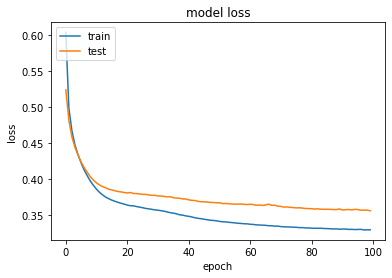

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [17]:
cm

array([[1530,   65],
       [ 199,  206]], dtype=int64)

In [18]:
score

0.868